In [1]:
# Import dependencies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np
import pandas as pd
import matplotlib.patches as patches

In [5]:
anno_path_box = "C:/Users/u27d41/Desktop/TLR/tl-detector/TrafficLightClassification/input/lisa-traffic-light-dataset/sample-dayClip6/sample-dayClip6/frameAnnotationsBOX.csv"
anno_path_bulb = "C:/Users/u27d41/Desktop/TLR/tl-detector/TrafficLightClassification/input/lisa-traffic-light-dataset/sample-dayClip6/sample-dayClip6/frameAnnotationsBULB.csv"
frames_path = "C:/Users/u27d41/Desktop/TLR/tl-detector/TrafficLightClassification/input/lisa-traffic-light-dataset/sample-dayClip6/sample-dayClip6/frames/"
print("Choosing random image...")
frame_id = random.choice(os.listdir(frames_path))
# frame_id = 'dayClip6--00099.jpg'  
frame_path = os.path.join(os.path.join(frames_path,frame_id))
print("Using image:\t'{}'\nLocation:\t'{}'".format(frame_id, frame_path))
# To draw a box around the traffic light bulb, use 'anno_path_bulb' below, instead of 'anno_path_box'
annotations = []
with open(anno_path_box) as fp:  
    line = fp.readline()
    line = fp.readline() # Skip header line with descriptions
    #cnt = 1
    while line:
        anno_file_path = (line.strip()).split(";")
        anno_file_id = anno_file_path[0].split("/")[1]
        if anno_file_id == frame_id:
            annotations.append(anno_file_path)
            #print("\t{}".format(anno_file_id))
        line = fp.readline()

Choosing random image...
Using image:	'dayClip6--00021.jpg'
Location:	'C:/Users/u27d41/Desktop/TLR/tl-detector/TrafficLightClassification/input/lisa-traffic-light-dataset/sample-dayClip6/sample-dayClip6/frames/dayClip6--00021.jpg'


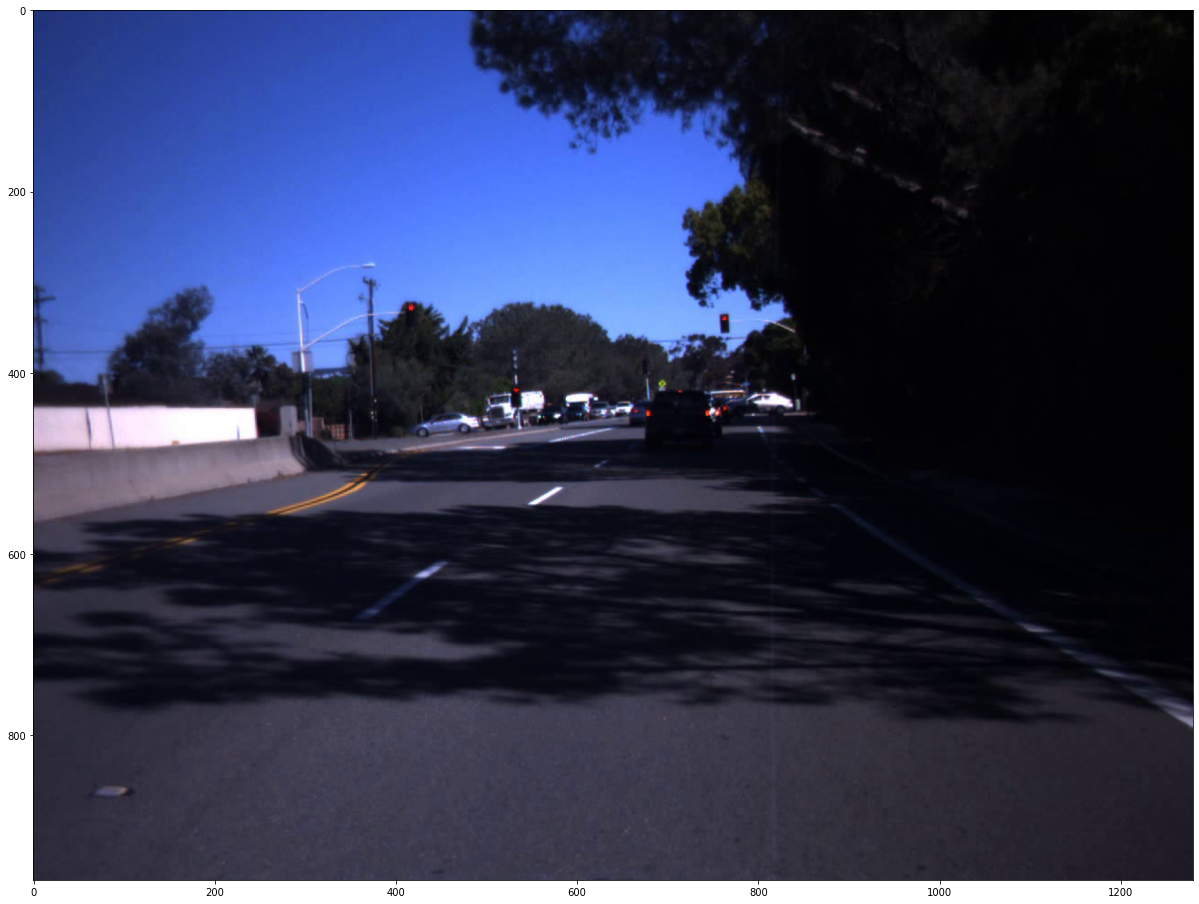

Found 3 annotations:
	Class: 'stop' at [410,323,425,345]
	Class: 'stop' at [756,336,768,354]
	Class: 'stopLeft' at [526,416,541,434]


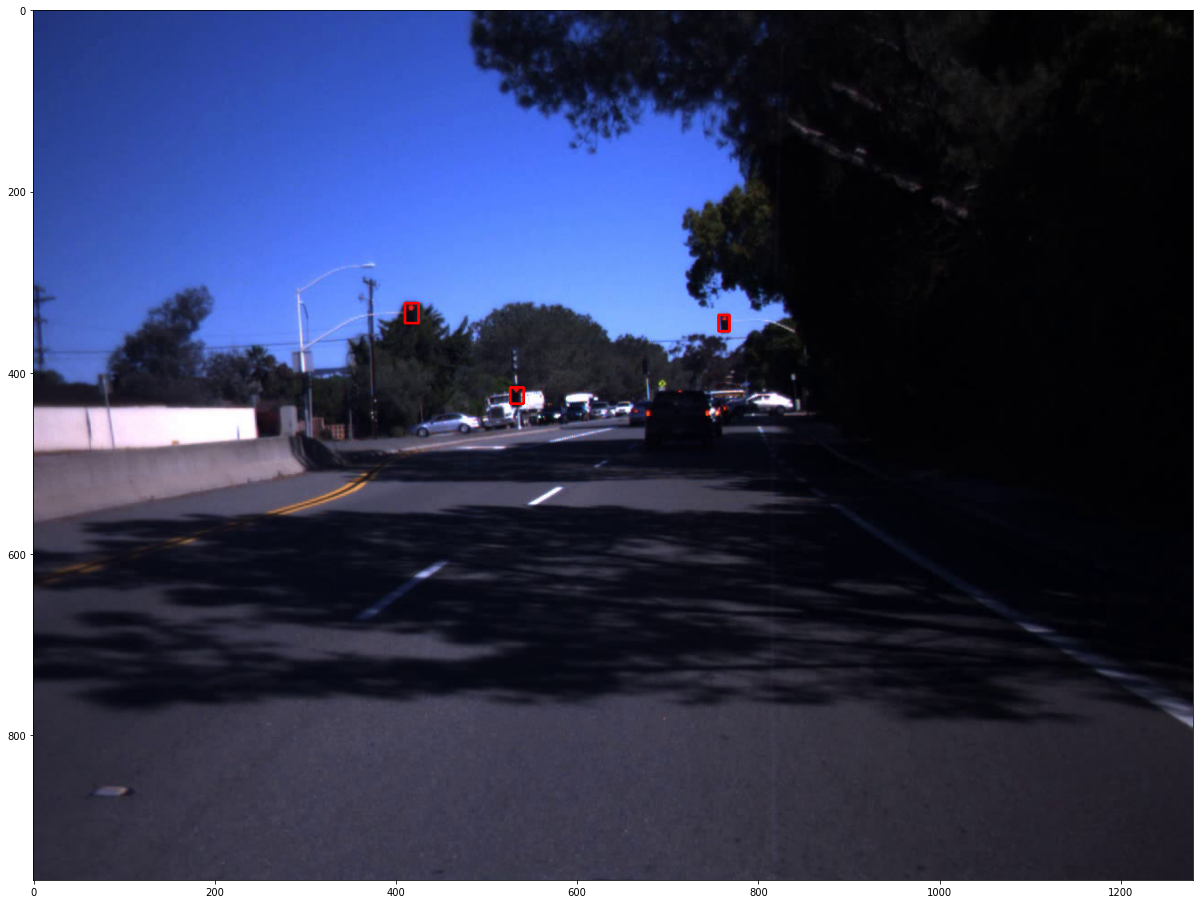

In [6]:
# Plot annotations on image
color_space = [(0,255,0),(255,0,0),(255,0,0)]
img = cv2.imread(frame_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [32, 16]
plt.imshow(img)
plt.show()
print("Found {} annotations:".format(len(annotations)))

for anno in annotations:
    anno_class = anno[1]
    anno_left = int(anno[2])
    anno_top = int(anno[3])
    anno_right = int(anno[4])
    anno_bot = int(anno[5])
    print("\tClass: '{}' at [{},{},{},{}]".format(anno_class, anno_left, anno_top, anno_right, anno_bot))
    if anno_class == "go" or anno_class == "goLeft" or anno_class == "goForward":
        color_class = color_space[0]
    elif anno_class == "warning" or anno_class == "warningLeft":
        color_class = (255,255,0)
    elif anno_class == "stop" or anno_class == "stopLeft":
        color_class = color_space[1]
    cv2.rectangle(img, (anno_left, anno_top), (anno_right, anno_bot), color_class, 2)

    
plt.imshow(img)
plt.show()

In [7]:
anno_data_frame = pd.read_csv(anno_path_box, ';') 
anno_data_frame.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin file,Origin frame number,Origin track,Origin track frame number
0,dayTraining/dayClip6--00000.jpg,stop,506,354,518,372,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,0,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,0
1,dayTraining/dayClip6--00000.jpg,stopLeft,595,423,613,454,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,0,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,0
2,dayTraining/dayClip6--00001.jpg,stop,504,352,516,370,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,1,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,1
3,dayTraining/dayClip6--00001.jpg,stopLeft,591,424,612,446,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,1,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,1
4,dayTraining/dayClip6--00002.jpg,stop,500,346,512,364,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,2,dayTraining/dayClip6/dayClip6Shutter0.000200-G...,2


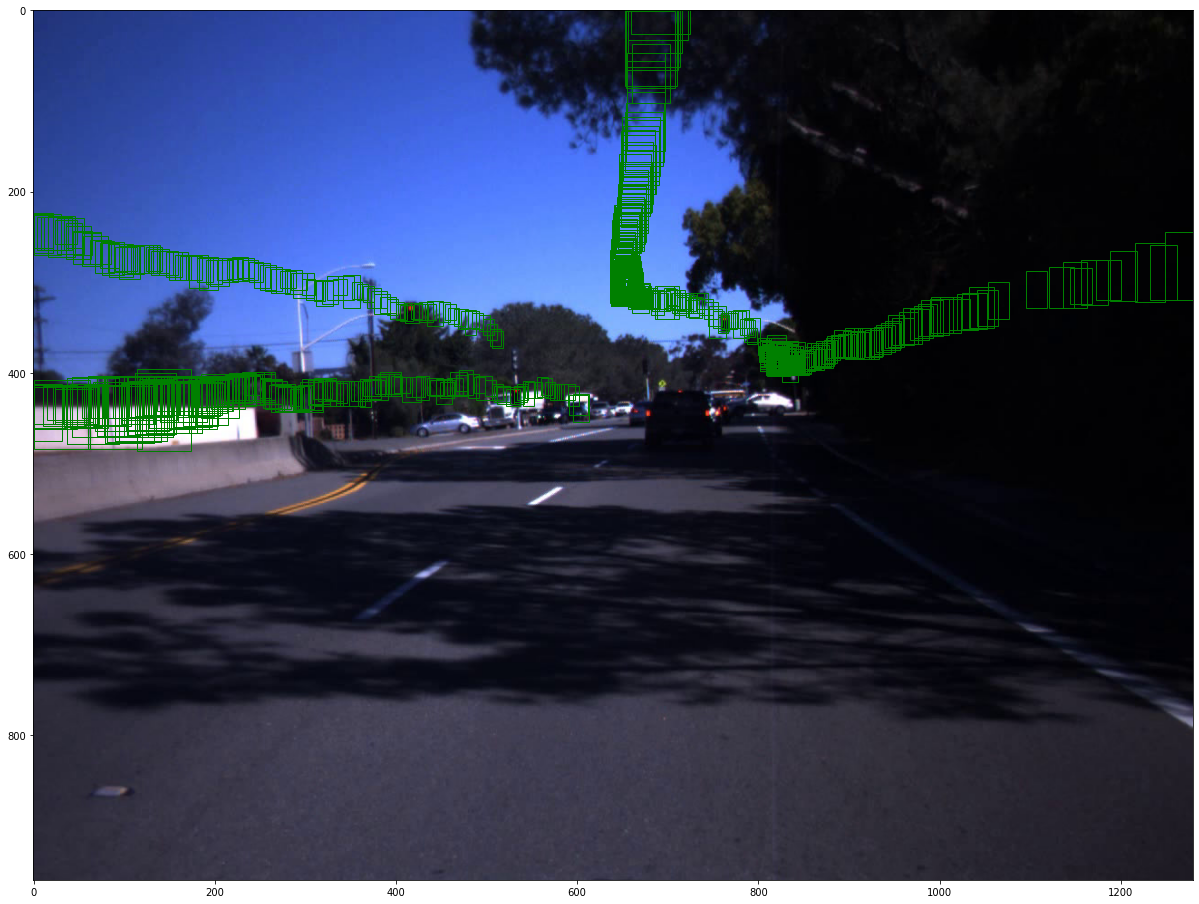

In [8]:
plt.figure(figsize=(32,16))
currentAxis = plt.gca()

for index, row in anno_data_frame.iterrows():
    width = row['Lower right corner X'] - row['Upper left corner X']
    height = row['Lower right corner Y'] - row['Upper left corner Y']
    topLeft = (row['Upper left corner X'], row['Upper left corner Y'])
    currentAxis.add_patch(patches.Rectangle(topLeft, width, height, alpha=1, fill=False, edgecolor='green'))

example_image = cv2.imread(frame_path)
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

plt.imshow(example_image)
plt.show()

In [9]:
anno_data_frame['Annotation tag'].value_counts()

go          426
stop        412
stopLeft    314
Name: Annotation tag, dtype: int64

In [ ]:
print("Number of Unique Images: ",df.image_id.nunique(),'/',df.shape[0])